In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [11]:
def score_model(model, X, y):
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred)
    return acc, precision, recall, f1, cm, classification_report(y, y_pred)


In [12]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [13]:
def fine_tune_model(model, X_train, y_train, X_val, y_val):
    param_grid = {'C': [0.1, 1, 10]} if isinstance(model, LogisticRegression) else {}
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, scoring='precision', cv=5)
        grid_search.fit(X_train, y_train)
        return grid_search.best_estimator_
    return model

Naive Bayes - Accuracy: 0.9676646706586827, Precision: 0.9688287425149701, Recall: 0.9676646706586827, F1-score: 0.9657451501413727
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       723
           1       1.00      0.76      0.86       112

    accuracy                           0.97       835
   macro avg       0.98      0.88      0.92       835
weighted avg       0.97      0.97      0.97       835




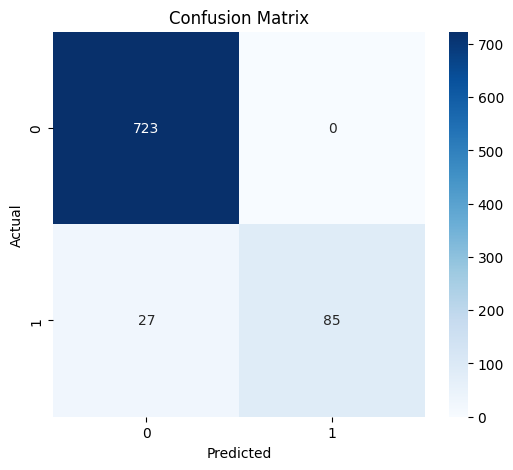

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

Logistic Regression - Accuracy: 0.9844311377245509, Precision: 0.9843838187066898, Recall: 0.9844311377245509, F1-score: 0.9841534289368997
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       723
           1       0.98      0.90      0.94       112

    accuracy                           0.98       835
   macro avg       0.98      0.95      0.97       835
weighted avg       0.98      0.98      0.98       835




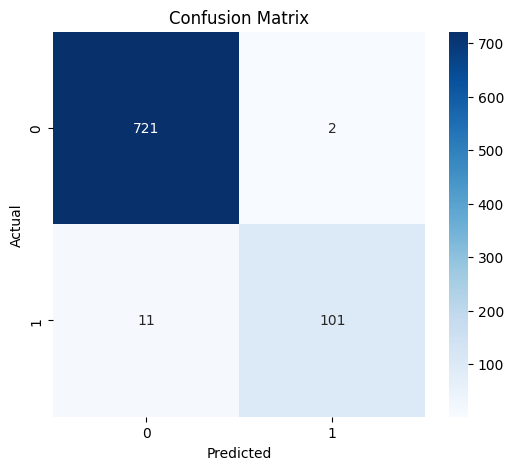

SVM - Accuracy: 0.9784431137724551, Precision: 0.9786843093245176, Recall: 0.9784431137724551, F1-score: 0.9777319611014738
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       723
           1       0.99      0.85      0.91       112

    accuracy                           0.98       835
   macro avg       0.98      0.92      0.95       835
weighted avg       0.98      0.98      0.98       835




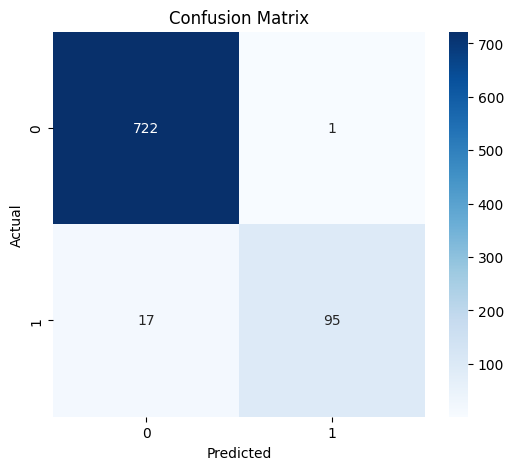

Best model selected based on recall, evaluating on test set...
Test Accuracy: 0.9832535885167464, Precision: 0.9831213508952941, Recall: 0.9832535885167464, F1-score: 0.982989476410529
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       724
           1       0.97      0.90      0.94       112

    accuracy                           0.98       836
   macro avg       0.98      0.95      0.96       836
weighted avg       0.98      0.98      0.98       836



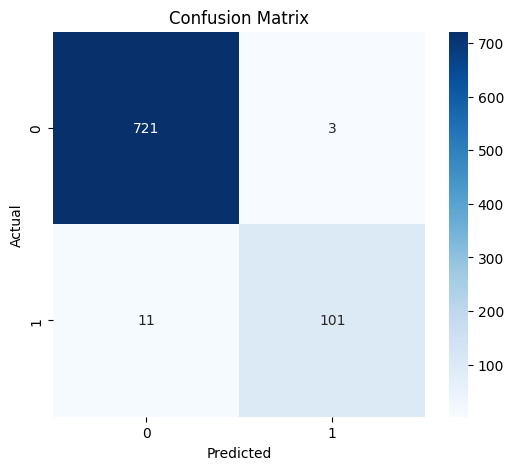

In [14]:
def main():
    train = pd.read_csv('train.csv').dropna()
    validation = pd.read_csv('validation.csv').dropna()
    test = pd.read_csv('test.csv').dropna()

    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train['message'])
    y_train = train['label']
    X_val = vectorizer.transform(validation['message'])
    y_val = validation['label']
    X_test = vectorizer.transform(test['message'])
    y_test = test['label']

    models = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC()
    }

    best_model = None
    best_recall = 0

    for name, model in models.items():
        model = train_model(model, X_train, y_train)
        model = fine_tune_model(model, X_train, y_train, X_val, y_val)
        acc, precision, recall, f1, cm, report = score_model(model, X_val, y_val)
        print(f"{name} - Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-score: {f1}\n{report}\n")
        plot_confusion_matrix(cm)
        if recall > best_recall:
            best_recall = recall
            best_model = model

    print("Best model selected based on recall, evaluating on test set...")
    acc, precision, recall, f1, cm, report = score_model(best_model, X_test, y_test)
    print(f"Test Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1-score: {f1}\n{report}")
    plot_confusion_matrix(cm)

main()